In [2]:
import sys
import os

# Go to the root of your project where LassoHomotopy/ exists
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)


In [3]:
from LassoHomotopy.model.lasso_homotopy import LassoHomotopyModel


In [4]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import csv

# Ensure project root is in path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from LassoHomotopy.model.lasso_homotopy import LassoHomotopyModel


In [5]:
def load_csv(filename):
    with open(filename, "r") as f:
        reader = csv.DictReader(f)
        data = [row for row in reader]
        
    x_keys = [k for k in data[0].keys() if k.startswith("X")]
    X = np.array([[float(row[k]) for k in x_keys] for row in data])
    y = np.array([float(row["y"]) for row in data])
    return X, y

X, y = load_csv("../tests/generated_data.csv")
print("Data Loaded:", X.shape, y.shape)


Data Loaded: (1000, 10) (1000,)


In [6]:
model = LassoHomotopyModel(alpha=0.1)
results = model.fit(X, y)
predictions = results.predict(X)

print("Fitted Coefficients:")
print(results.coef_)


Fitted Coefficients:
[ 3.02752812e+00  0.00000000e+00  4.95957544e-04  2.99344719e-02
  7.30228521e+00  3.04368717e-02  3.53487314e-03 -2.88383110e-02
 -3.07775595e-03  1.04523816e-03]


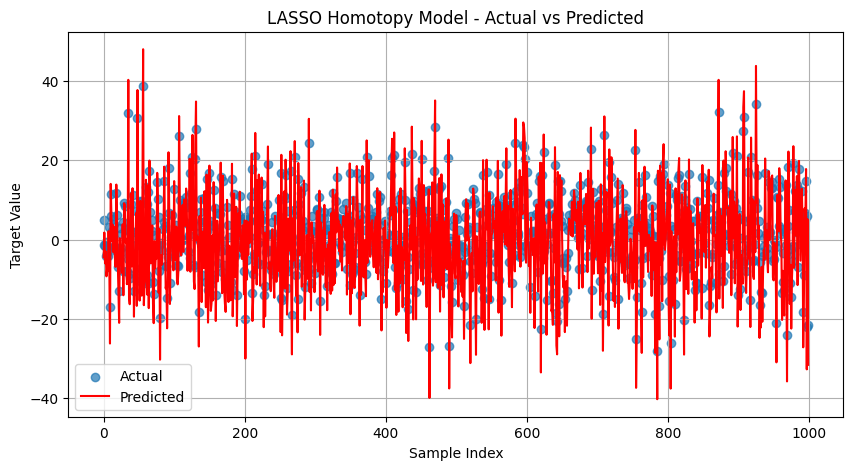

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y)), y, label="Actual", alpha=0.7)
plt.plot(range(len(predictions)), predictions, label="Predicted", color='r')
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.title("LASSO Homotopy Model - Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


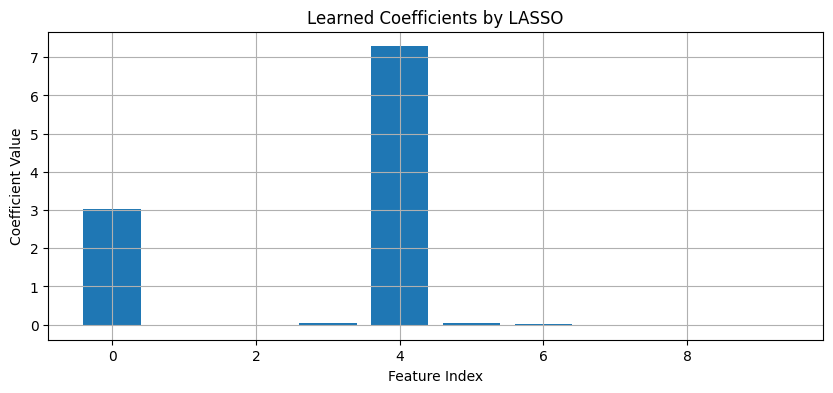

In [8]:
plt.figure(figsize=(10, 4))
plt.bar(range(len(results.coef_)), results.coef_)
plt.title("Learned Coefficients by LASSO")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()
